In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline
from IPython.core.display import HTML
HTML("""<style>.output_png img {display: block;margin-left: auto;margin-right: auto;} </style>""")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quantstats as qs
import statistics as st
from datetime import datetime, timedelta
from matplotlib.colors import DivergingNorm
from scipy.signal import convolve2d
import import_ipynb
import Functions

importing Jupyter notebook from Functions.ipynb


In [3]:
qs.extend_pandas()
plt.rcParams['figure.figsize'] = (26,12)
plt.rcParams['text.color'] = 'w'
plt.rcParams['legend.facecolor'] = '#2f3540'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'


SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIG_SIZE = 17
plt.rcParams['font.size'] = SMALL_SIZE
plt.rcParams['axes.titlesize'] = BIG_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = SMALL_SIZE
plt.rcParams['figure.titlesize'] = BIG_SIZE

np.set_printoptions(edgeitems=40, linewidth=1000)

pd.set_option("display.precision", 6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# %load_ext autoreload
# %autoreload 2
# %run Helper.py
# import Helper
%run Functions.ipynb

In [5]:
ini_equity = 100
commision = 0.000111538462 # 0.001 = 0.1% of the daily return

## Download data from SP500

In [6]:
#data = get_sp500_data(from_local_file=False, save_to_file=True)
data = get_sp500_data(from_local_file=True, save_to_file=False)
data.shape
from_date = '1970-01-01'
df = data.loc[from_date: , ['Close']].copy()
df['Market_daily_ret'] = df['Close'].pct_change()

(12689, 5)

In [7]:
df.head()

Close  Market_daily_ret
Date                                   
1970-01-02  93.000000               NaN
1970-01-05  93.459999          0.004946
1970-01-06  92.820000         -0.006848
1970-01-07  92.629997         -0.002047
1970-01-08  92.680000          0.000540

In [8]:
df.tail()

Close  Market_daily_ret
Date                                     
2020-04-15  2783.360107         -0.022030
2020-04-16  2799.550049          0.005817
2020-04-17  2874.560059          0.026794
2020-04-20  2823.159912         -0.017881
2020-04-21  2736.560059         -0.030675

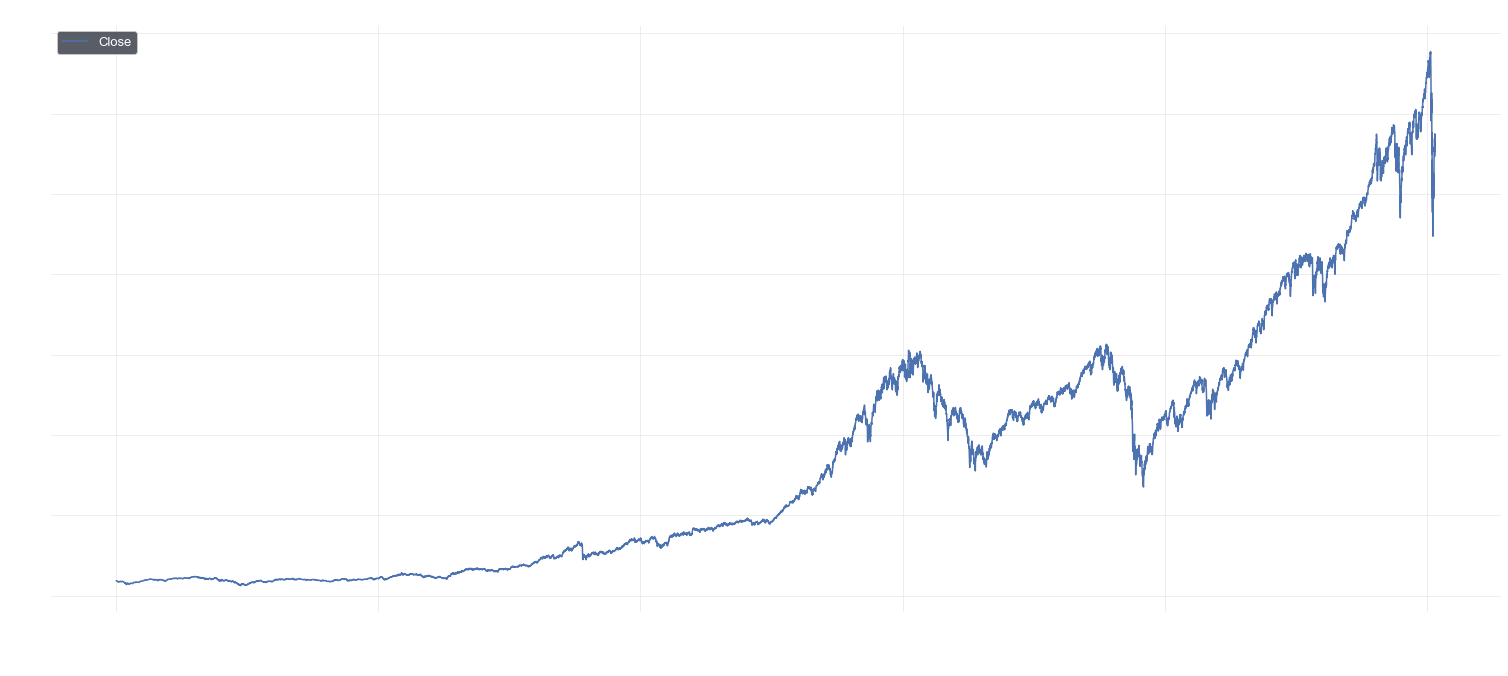

In [9]:
df['Close'].plot(legend=True, title="SP500")

In [10]:
#df.loc['2020', 'Close'].plot(legend=True, title="SP500 in 2020")

## Simple backtest

### 80-200 MA crossover. 2020-now. Good to check transaction costs

In [11]:
%run Functions.ipynb

	Period: 2020-01-02 to 2020-04-21
	Overall return of SP500: 84.70 %. SR of SP500: -0.72
	Overall return of 80-200 MA crossover: 90.05 %. Sharpe ratio strategy: -0.35


Close  Market_daily_ret  Strat_position  Strat_daily_ret  Market_cum_ret  Strat_cum_ret
Date                                                                                                     
2020-04-16  2799.550049          0.005817               1         0.005817       86.652450      86.652450
2020-04-17  2874.560059          0.026794               1         0.026794       88.974181      88.974181
2020-04-20  2823.159912         -0.017881              -1        -0.017993       87.383229      87.373305
2020-04-21  2736.560059         -0.030675              -1         0.030675       84.702766      90.053463

	Period: 2020-01-02 to 2020-04-21
	Overall return of SP500: 84.70 %. SR of SP500: -0.72
	Overall return of 80-200 MA crossover: 90.06 %. Sharpe ratio strategy: -0.35


Close  Market_daily_ret  Strat_position  Strat_daily_ret  Market_cum_ret  Strat_cum_ret
Date                                                                                                     
2020-04-16  2799.550049          0.005817               1         0.005817       86.652450      86.652450
2020-04-17  2874.560059          0.026794               1         0.026794       88.974181      88.974181
2020-04-20  2823.159912         -0.017881              -1        -0.017881       87.383229      87.383229
2020-04-21  2736.560059         -0.030675              -1         0.030675       84.702766      90.063692

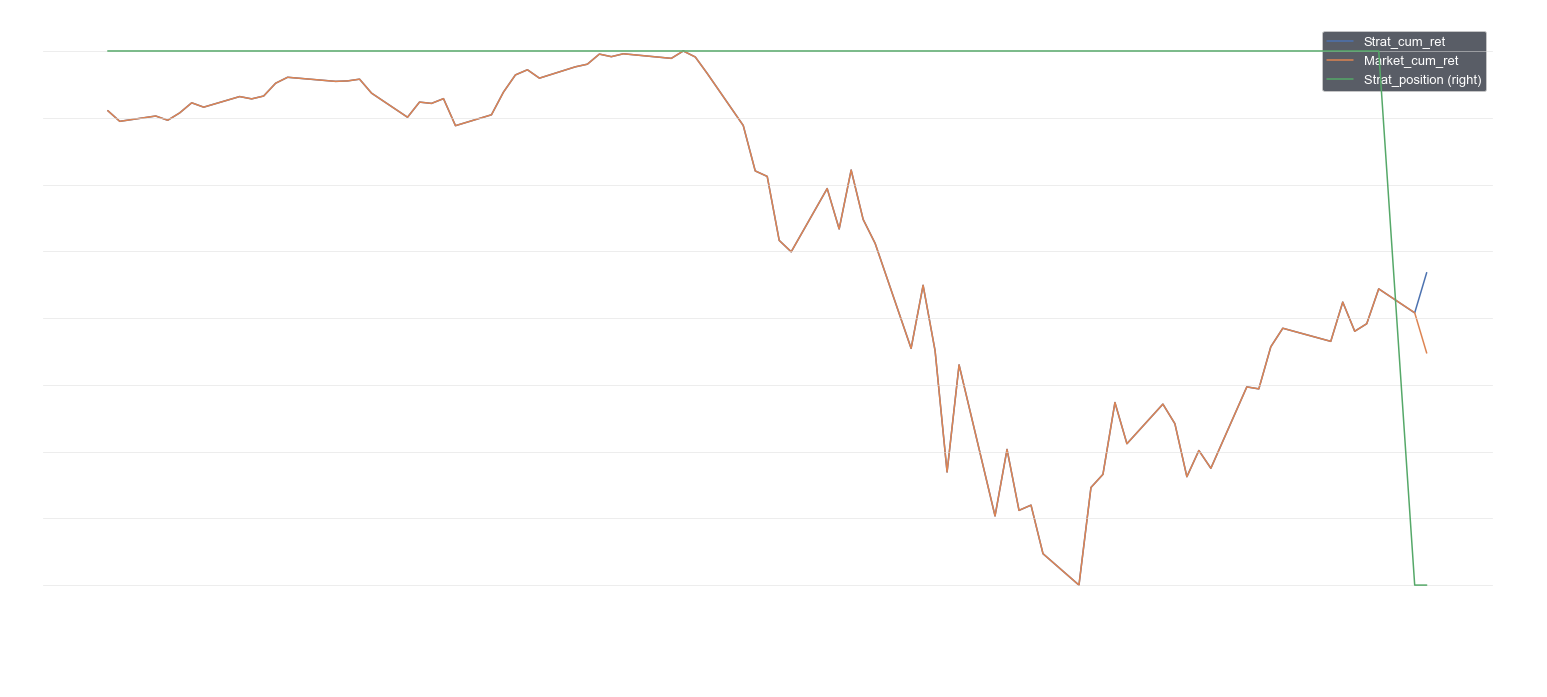

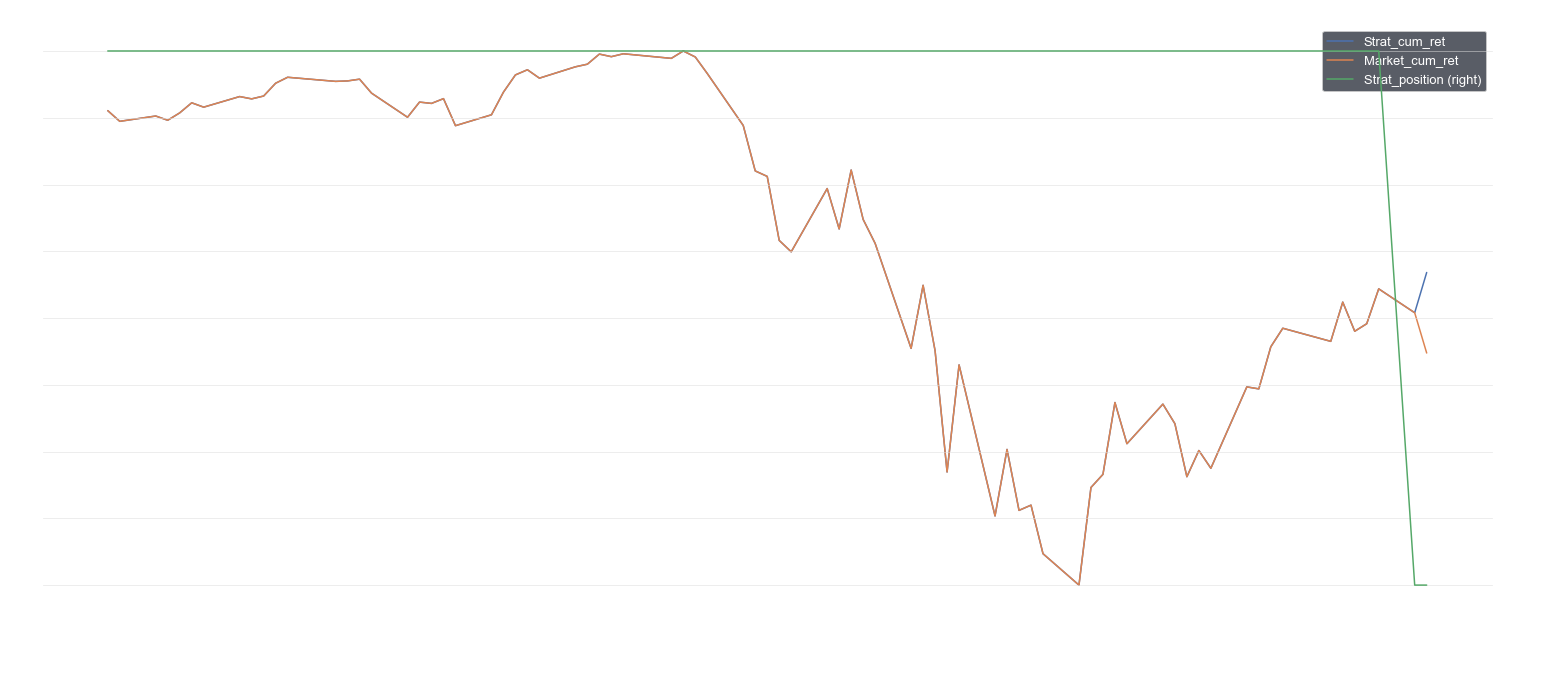

In [12]:
st = '2020'
test_df = df.loc[st:].copy()
ma_backtest_print_plot(test_df, fast_ma=80, slow_ma=200, ini_equity=100, commision=commision)
test_df.tail(4)
ma_backtest_print_plot(test_df, fast_ma=80, slow_ma=200, ini_equity=100, commision=0)
test_df.tail(4)

# ma_backtest_print_plot(test_df, fast_ma=80, slow_ma=200, ini_equity=100, commision)
# test_df.tail(4)
# ma_backtest_print_plot(test_df, fast_ma=80, slow_ma=200, ini_equity=100, commision=0)
# test_df.tail(4)

### 50-100 MA crossover. 2018. Check SR

	Period: 2018-01-02 to 2018-12-31
	Overall return of SP500: 93.76 %. SR of SP500: -0.29
	Overall return of 50-100 MA crossover: 98.55 %. Sharpe ratio strategy: -0.00
SR:
Market: -0.000
Strategy: -0.294


Close  Market_daily_ret  Strat_position  Strat_daily_ret  Market_cum_ret  Strat_cum_ret
Date                                                                                                     
2018-01-02  2695.810059          0.008303               1         0.008303      100.830336     100.830336
2018-01-03  2713.060059          0.006399               1         0.006399      101.475531     101.475531
2018-01-04  2723.989990          0.004029               1         0.004029      101.884339     101.884339
2018-01-05  2743.149902          0.007034               1         0.007034      102.600970     102.600970
2018-01-08  2747.709961          0.001662               1         0.001662      102.771528     102.771528
...                 ...               ...             ...              ...             ...            ...
2018-12-24  2351.100098         -0.027112              -1         0.027112       87.937283     105.355889
2018-12-26  2467.699951          0.049594              -1        -0.049594       92.298422     100.130896
2018-12-27  2488.830078          0.008563              -1        -0.008563       93.088744      99.273507
2018-12-28  2485.739990         -0.001242              -1         0.001242       92.973167      99.396763
2018-12-31  2506.850098          0.008492              -1        -0.008492       93.762740      98.552638

[251 rows x 6 columns]

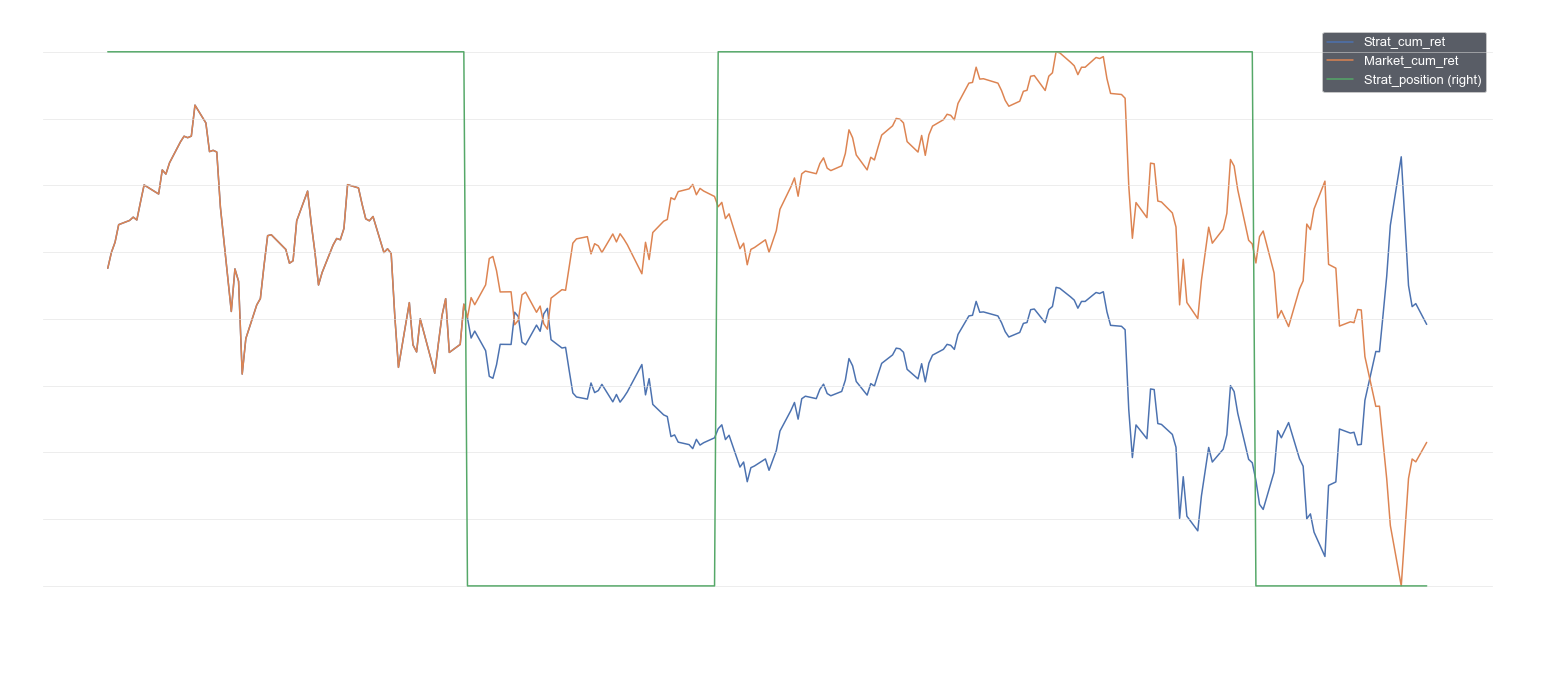

In [13]:
start = '2018'
end = '2018'

test_df = df.loc[start:end].copy()

ma_backtest_print_plot(test_df, fast_ma=50, slow_ma=100)

print("SR:\nMarket: {:.3f}\nStrategy: {:.3f}".format(test_df['Strat_daily_ret'].sharpe(), test_df['Market_daily_ret'].sharpe()))

test_df

## Walk-Forward Optimization

### Define values of Moving Averages and time periods for optimization

In [14]:
%run Functions.ipynb

In [15]:
fast_ma = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
slow_ma = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240]

# IS_start_years = pd.date_range(start='1970-01-01', end='2017-01-01', freq='1YS', closed=None)
# IS_end_years = pd.date_range(start='1972-12-31', end='2019-12-31', freq='1Y', closed=None)
# OOS_start_years = pd.date_range(start='1973-01-01', end='2020-01-01', freq='1YS', closed=None)
# OOS_end_years = pd.date_range(start='1973-12-31', end='2020-12-31', freq='1Y', closed=None)

IS_start_years = pd.date_range(start='1970-01-01', end='2017-01-01', freq='1YS', closed=None)
IS_end_years = pd.date_range(start='1972-12-31', end='2019-12-31', freq='1Y', closed=None)
OOS_start_years = pd.date_range(start='1973-01-01', end='2020-01-01', freq='1YS', closed=None)
OOS_end_years = pd.date_range(start='1973-12-31', end='2020-12-31', freq='1Y', closed=None)

len(IS_start_years)
#print_periods(IS_start_years, IS_end_years, OOS_start_years, OOS_end_years)

48

### Optimization

In [16]:
%run Functions.ipynb

In [17]:
market_pln = []
oos_pln = []
market_sr = []
oos_sr = []
market_max_dd = []
oos_max_dd = []

best_combinations = []

for IS_start, IS_end, OOS_start, OOS_end in zip(IS_start_years, IS_end_years, OOS_start_years, OOS_end_years):
    results_pnl = np.zeros((len(fast_ma),len(slow_ma)))
    results_sharpe = np.zeros((len(fast_ma),len(slow_ma)))

    in_sample = df.loc[IS_start:IS_end].copy()
    oos_sample = df.loc[OOS_start:OOS_end].copy()
    
    ############################################ IN SAMPLE  ############################################
    results_pnl, results_sharpe = run_all_combinations(in_sample, fast_ma, slow_ma, allow_long_only=True)
    # Get index of maximum SR for the In-Sample period
    fast_index, slow_index, robust_results_sharpe = get_best_combination(results_sharpe)
    
    #title = "Robust SR In Sample ("+str(IS_start.date())+":"+ str(IS_end.date()) +")"
    #show_heatmap(robust_results_sharpe, plot_title=title, x_title="Slow MA", x_values=slow_ma, y_title="Fast MA", y_values=fast_ma)

    print("Best In-sample performance:")
    print_backtest_stats(in_sample, fast_ma[fast_index], slow_ma[slow_index], results_pnl[fast_index, slow_index], results_sharpe[fast_index, slow_index])
    
    ############################################ OUT OF SAMPLE  ############################################
    print("OOS performance:")
    _, pnl_sp, sharpe_sp = backtest_ma_strat(oos_sample, fast_ma=1, slow_ma=1)    
    _, pnl, sharpe = backtest_ma_strat(oos_sample, fast_ma[fast_index], slow_ma[slow_index])
    print_backtest_stats(oos_sample, fast_ma[fast_index], slow_ma[slow_index], pnl, sharpe)  
    best_combinations.append([fast_ma[fast_index], slow_ma[slow_index]])
    
    ############################################ Save metrics  ############################################
    market_max_dd.append(oos_sample['Market_daily_ret'].max_drawdown())
    oos_max_dd.append(oos_sample['Strat_daily_ret'].max_drawdown())
    market_pln.append(pnl_sp)
    market_sr.append(sharpe_sp)
    oos_pln.append(pnl)
    oos_sr.append(sharpe)
    
    # Save OOS position and daily returns
    df.loc[OOS_start:OOS_end, 'Strat_position'] = oos_sample['Strat_position']
    df.loc[OOS_start:OOS_end, 'OOS_daily_ret'] = oos_sample['Strat_daily_ret']
    print()
    
results_df = prepare_oos_df(df.loc[OOS_start_years[0]:OOS_end_years[-1]].copy())
results_df.iloc[[0,-1]]

print("End of optimization")

Best In-sample performance:
	Period: 1970-01-02 to 1972-12-29
	Overall return of SP500: nan %. SR of SP500: 0.75
	Overall return of 30-40 MA crossover: 148.75 %. Sharpe ratio strategy: 1.21
OOS performance:
	Period: 1973-01-02 to 1973-12-31
	Overall return of SP500: 82.63 %. SR of SP500: -1.13
	Overall return of 30-40 MA crossover: 99.73 %. Sharpe ratio strategy: 0.06

Best In-sample performance:
	Period: 1971-01-04 to 1973-12-31
	Overall return of SP500: 105.86 %. SR of SP500: 0.22
	Overall return of 55-180 MA crossover: 128.36 %. Sharpe ratio strategy: 0.76
OOS performance:
	Period: 1974-01-02 to 1974-12-31
	Overall return of SP500: 70.28 %. SR of SP500: -1.50
	Overall return of 55-180 MA crossover: 135.61 %. Sharpe ratio strategy: 1.50

Best In-sample performance:
	Period: 1972-01-03 to 1974-12-31
	Overall return of SP500: 67.16 %. SR of SP500: -0.73
	Overall return of 40-240 MA crossover: 159.73 %. Sharpe ratio strategy: 1.04
OOS performance:
	Period: 1975-01-02 to 1975-12-31
	Over

Best In-sample performance:
	Period: 1993-01-04 to 1995-12-29
	Overall return of SP500: 141.36 %. SR of SP500: 1.35
	Overall return of long only: 141.36 %. Sharpe ratio strategy: 1.35
OOS performance:
	Period: 1996-01-02 to 1996-12-31
	Overall return of SP500: 120.26 %. SR of SP500: 1.61
	Overall return of long only: 120.26 %. Sharpe ratio strategy: 1.61

Best In-sample performance:
	Period: 1994-01-03 to 1996-12-31
	Overall return of SP500: 158.80 %. SR of SP500: 1.59
	Overall return of long only: 158.80 %. Sharpe ratio strategy: 1.59
OOS performance:
	Period: 1997-01-02 to 1997-12-31
	Overall return of SP500: 131.01 %. SR of SP500: 1.58
	Overall return of long only: 131.01 %. Sharpe ratio strategy: 1.58

Best In-sample performance:
	Period: 1995-01-03 to 1997-12-31
	Overall return of SP500: 211.30 %. SR of SP500: 1.94
	Overall return of long only: 211.30 %. Sharpe ratio strategy: 1.94
OOS performance:
	Period: 1998-01-02 to 1998-12-31
	Overall return of SP500: 126.67 %. SR of SP500: 

Best In-sample performance:
	Period: 2016-01-04 to 2018-12-31
	Overall return of SP500: 122.65 %. SR of SP500: 0.59
	Overall return of 25-220 MA crossover: 151.67 %. Sharpe ratio strategy: 1.14
OOS performance:
	Period: 2019-01-02 to 2019-12-31
	Overall return of SP500: 128.88 %. SR of SP500: 2.10
	Overall return of 25-220 MA crossover: 103.45 %. Sharpe ratio strategy: 0.33

Best In-sample performance:
	Period: 2017-01-03 to 2019-12-31
	Overall return of SP500: 144.31 %. SR of SP500: 1.02
	Overall return of long only: 144.31 %. Sharpe ratio strategy: 1.02
OOS performance:
	Period: 2020-01-02 to 2020-04-21
	Overall return of SP500: 84.70 %. SR of SP500: -0.72
	Overall return of long only: 84.70 %. Sharpe ratio strategy: -0.72



Close  Strat_position  Market_daily_ret  OOS_daily_ret  Market_cum_ret  OOS_cum_ret
Date                                                                                                 
1973-01-02   119.099998             1.0          0.008894       0.008894      100.889450   100.889450
2020-04-21  2736.560059             1.0         -0.030675      -0.030675     2318.136373   841.546925

End of optimization


In [18]:
#best_combinations

### Plot OOS of Strategy vs Benchmark

 1.0    9918
-1.0    2013
Name: Strat_position, dtype: int64

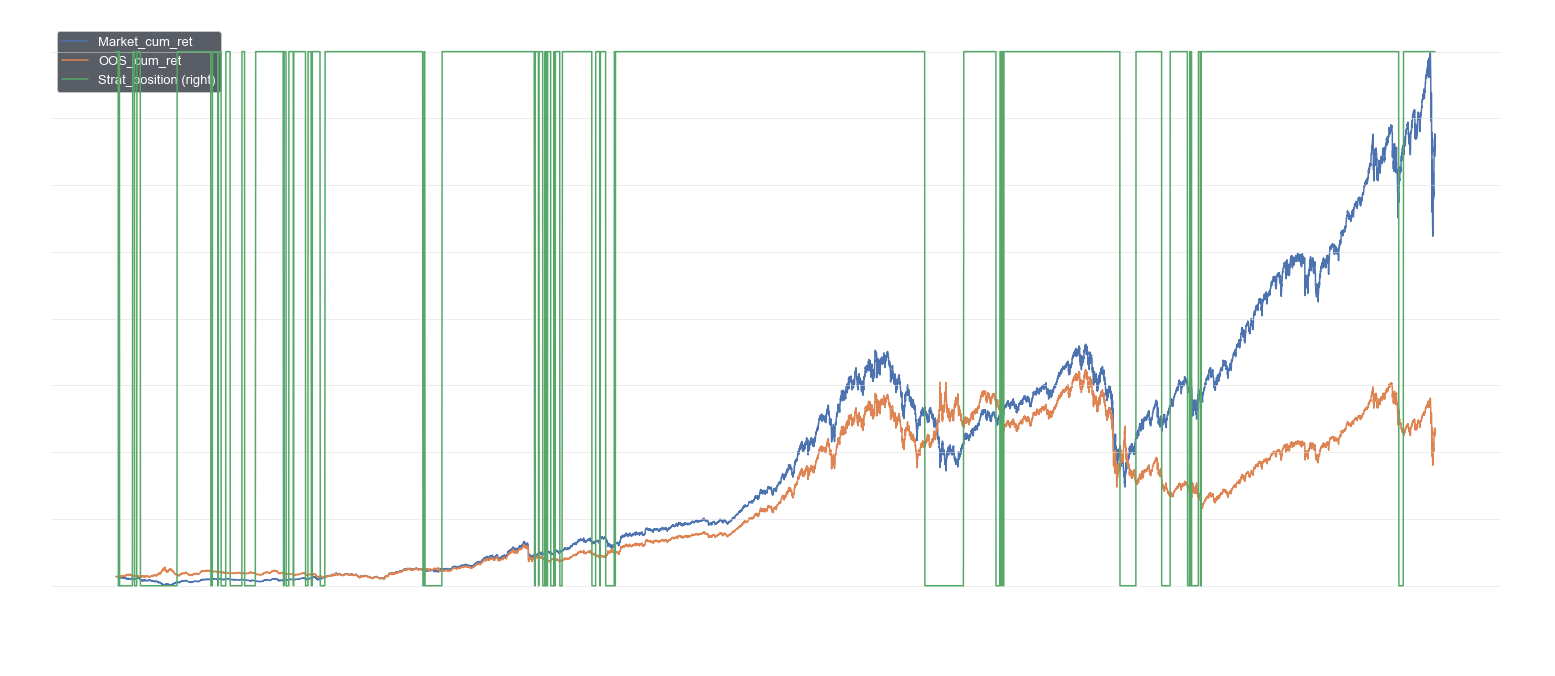

In [19]:
results_df['Strat_position'].value_counts()
show_oos_plot(results_df)

### Save metrics from the optimization

In [20]:
metrics = ['PNL', 'SR', 'MAX_DD']
index = pd.MultiIndex.from_product([['SP500', 'Strategy']], names=['Asset'])
columns = pd.MultiIndex.from_product([[], metrics], names=['Year', 'Metric'])

metrics_df = pd.DataFrame([], index=index, columns=columns)

for i, year in enumerate(OOS_start_years.year):
    year_sp_pln = market_pln[i]
    year_oos_pln = oos_pln[i]
    year_sp_sr = market_sr[i]
    year_oos_sr = oos_sr[i]
    year_sp_dd = market_max_dd[i]
    year_oos_dd = oos_max_dd[i]
    
    year_data = [[year_sp_pln, year_sp_sr, year_sp_dd], [year_oos_pln, year_oos_sr, year_oos_dd]]
    
    metrics_df = add_data(metrics_df, year_data, year)

metrics_df

Year           1973                            1974                            1975                            1976                           1977                            1978                            1979                            1980                           1981                            1982                            1983                            1984                            1985                            1986                            1987                            1988                            1989                          1990                            1991                            1992                            1993                           1994                            1995                            1996                            1997                            1998                           1999                           2000                           2001                           2002                            2003                      \
Metric          PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD        PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD        PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR   MAX_DD        PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD        PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR   MAX_DD         PNL        SR    MAX_DD        PNL        SR    MAX_DD        PNL       SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD   
Asset                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
SP500     82.634477 -1.126119 -0.233533   70.281902 -1.500315 -0.375952  131.549016  1.847720 -0.141408  119.148460  1.627096 -0.083650  88.498045 -1.300780 -0.152243  101.062042  0.146459 -0.135527  112.308815  1.120375 -0.102453  125.773570  1.469919 -0.170719  90.269599 -0.690813 -0.183536  114.761319  0.841849 -0.165553  117.271042  1.257962 -0.069068  101.400602  0.171881 -0.126772  126.333408  2.351405 -0.076616  114.620409  0.998813 -0.094236  102.027503  0.232683 -0.335095  112.400841  0.767246 -0.076405  127.250465  1.911992 -0.07557  93.440862 -0.344089 -0.199187  126.306703  1.698666 -0.056038  104.464263  0.495754 -0.062433  107.055156  0.832436 -0.049942  98.460709 -0.108495 -0.089378  134.110655  3.800608 -0.025334  120.263666  1.613317 -0.076432  131.008182  1.575168 -0.107952  126.668589  1.267209 -0.19336  119.526047  1.077234 -0.120787  89.860815 -0.370296 -0.171998  86.957307 -0.55123 -0.296951   76.634036 -0.892748 -0.337524  126.380400  1.457266 -0.140534   
Strategy  99.732119  0.0

In [21]:
#metrics_df.xs('Strategy', axis=0).round(3).to_clipboard(sep=',')
#metrics_df.xs('Strategy', axis=0).T.sort_index().round(3).to_clipboard(sep=',')
#metrics_df.swaplevel(axis=1).swapaxes(0,1).sort_index().round(3).to_clipboard(sep=',')

#metrics_df.round(3).to_csv("metrics.csv", sep=';')

In [22]:
#by column: metrics_df.xs('PNL', axis=1, level='Metric')
#metrics_df.xs('PNL', axis=1, level=1) 
#metrics_df.xs('SP500', axis=0) #by index
#metrics_df.loc['SP500', (2013, 'PNL')]
#met = metrics_df.swaplevel(axis=1).swapaxes(0,1).sort_index()
#met

## Analysis of OOS performance

### HTML Reports 

In [23]:
html_df = results_df.copy()
html_df.iloc[[0,-1]]

Close  Strat_position  Market_daily_ret  OOS_daily_ret  Market_cum_ret  OOS_cum_ret
Date                                                                                                 
1973-01-02   119.099998             1.0          0.008894       0.008894      100.889450   100.889450
2020-04-21  2736.560059             1.0         -0.030675      -0.030675     2318.136373   841.546925

In [24]:
#save_report(html_df['Market_daily_ret'], html_df['Market_daily_ret'])
#qs.reports.full(results_df['OOS_daily_ret'], results_df['Market_daily_ret'])

### Transaction costs

#### Transaction costs example with a short period

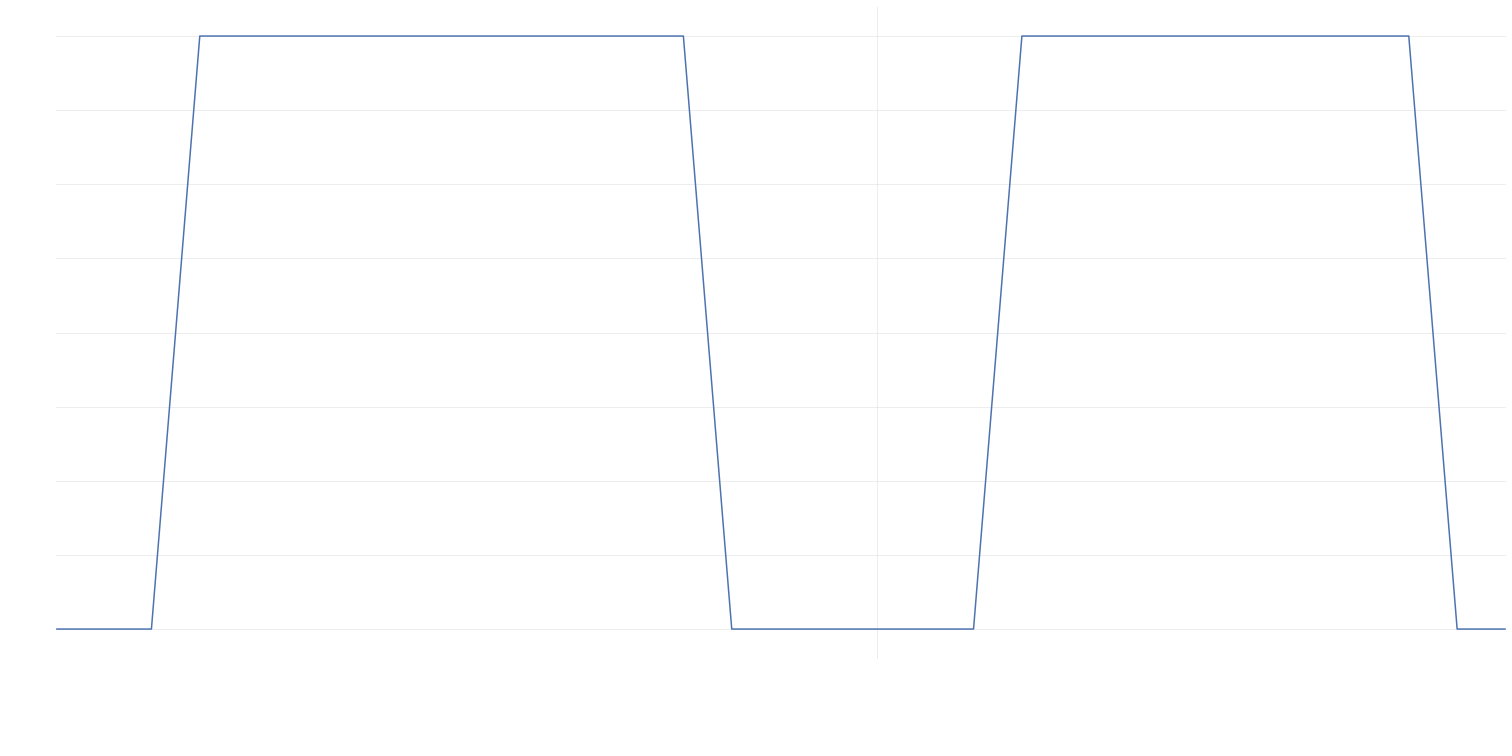

In [25]:
test = results_df.loc['2004-09-8':'2004-10-20', ['Market_daily_ret', 'OOS_daily_ret', 'OOS_cum_ret', 'Strat_position']].copy()
test['Strat_position'].plot()

In [26]:
n_changes = (test['Strat_position'] != test['Strat_position'].shift(1)).values.sum()
test['Costs'] = test['Market_daily_ret'].mul(test['Strat_position'].shift(1)).sub(test['OOS_daily_ret'])
test['Costs'].fillna(value=commision, limit=1, inplace=True)
test['Costs'] = test['Costs'].mul(test['OOS_cum_ret'])

print("Total number of changes in position: {}\nSum of simple costs (n_changes*commision): {:.6f}\nTotal costs using OOS_cum_ret(sum(commision*OOS_cum_ret of each day with a change)): {:.6f}".format(
    n_changes, n_changes*commision, test['Costs'].sum()))

Total number of changes in position: 5
Sum of simple costs (n_changes*commision): 0.000558
Total costs using OOS_cum_ret(sum(commision*OOS_cum_ret of each day with a change)): 0.530517


#### Transaction costs on our strategy (OOS)

Total number of changes in position: 81
Sum of simple costs (n_changes*commision): 0.009035
Total costs using OOS_cum_ret(sum(commision*OOS_cum_ret of each day with a change)): 71.470314
Tracsaction costs are 8.49% of the overall return


Close  Strat_position  Market_daily_ret  OOS_daily_ret  Market_cum_ret  OOS_cum_ret  Costs
2020-04-21  2736.560059             1.0         -0.030675      -0.030675     2318.136373   841.546925    0.0

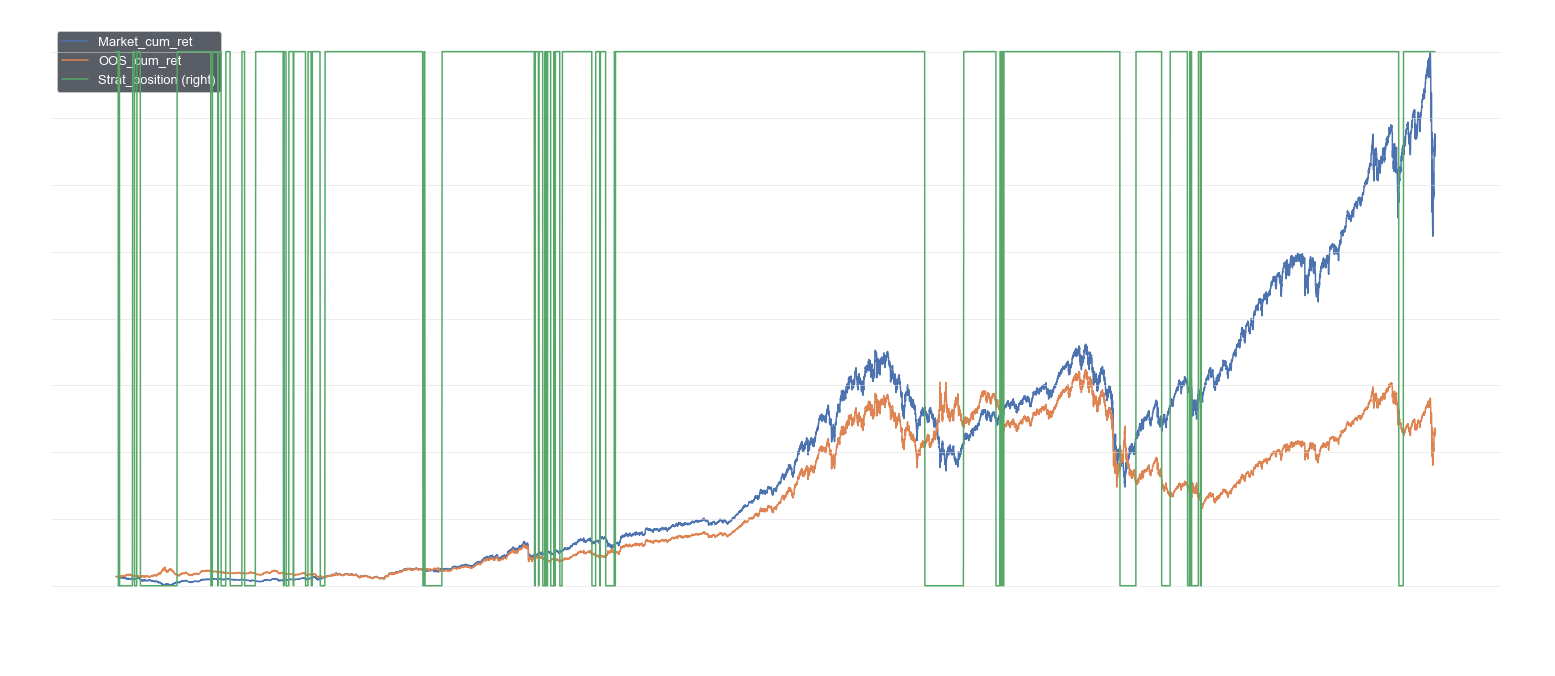

In [27]:
n_changes = (results_df['Strat_position'] != results_df['Strat_position'].shift(1)).values.sum()
results_df['Costs'] = results_df['Market_daily_ret'].mul(results_df['Strat_position'].shift(1)).sub(results_df['OOS_daily_ret'])
results_df['Costs'].fillna(value=commision, limit=1, inplace=True)
results_df['Costs'] = results_df['Costs'].mul(results_df['OOS_cum_ret'])

print("Total number of changes in position: {}\nSum of simple costs (n_changes*commision): {:.6f}\nTotal costs using OOS_cum_ret(sum(commision*OOS_cum_ret of each day with a change)): {:.6f}".format(
    n_changes, n_changes*commision, results_df['Costs'].sum()))
print("Tracsaction costs are {:.2%} of the overall return".format(results_df['Costs'].sum() / results_df['OOS_cum_ret'][-1]))
results_df.iloc[-1].to_frame().T
show_oos_plot(results_df)

###  Overall performance (PNL and SR) - Bad?

In [28]:
print("Overall OOS performace:")
print("\tMarket\tStrategy\nPNL:\t{:.2f}\t{:.2f}\nSR:\t{:.2f}\t{:.2f}".format(results_df.iloc[-1]['Market_cum_ret'], results_df.iloc[-1]['OOS_cum_ret'], 
                                           results_df['Market_daily_ret'].sharpe(), results_df['OOS_daily_ret'].sharpe()))

print("\nAverage OOS performace: (calculated as the mean of PNL and SR of all years)")
print("\tMarket\tStrategy\nPNL:\t{:.2f}\t{:.2f}\nSR:\t{:.2f}\t{:.2f}".format(np.mean(market_pln), np.mean(oos_pln), 
                                           np.mean(market_sr), np.mean(oos_sr)))

Overall OOS performace:
	Market	Strategy
PNL:	2318.14	841.55
SR:	0.47	0.35

Average OOS performace: (calculated as the mean of PNL and SR of all years)
	Market	Strategy
PNL:	108.24	105.74
SR:	0.71	0.53


## Deprecated

In [29]:
first_business_day = OOS_start_years[0] + pd.tseries.offsets.BusinessDay(n=1)
first_business_day
df.loc[[first_business_day]]

Timestamp('1973-01-02 00:00:00', freq='AS-JAN')

Close  Market_daily_ret  Strat_position  OOS_daily_ret
Date                                                                   
1973-01-02  119.099998          0.008894             1.0       0.008894

In [30]:
#df.loc[OOS_start_years[0] - pd.tseries.offsets.BusinessDay(n=1)]